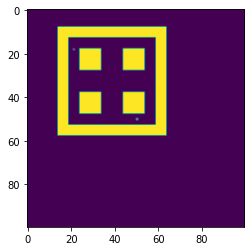

In [1]:
from physical_multiagent_env.scenarios.FollowTemplate.scenario import *
from physical_multiagent_env.utils.observation_functions import *

import time
import json 

import matplotlib
import matplotlib.pyplot as plt 
from IPython import display

transform = Observation_CNN.observation_fn_2

fig, ax = plt.subplots()

if __name__ == "__main__":
    with open("../reinforcement_learning/FollowTemplate/version2.json") as f :
        config = json.load(f)

    config = config['env_config']
    config['connect'] = p.DIRECT

    env = FollowTemplate(config)
    
    for i in range(10):
        env.set_phase(phase=6)
        state = env.reset()
        while True:
            alive_agents = []
            for index, agent in enumerate(env.objects['agent']):
                if agent.alive:
                    alive_agents.append(index)
            if not alive_agents:
                break 
            agent_obs = transform(state, 
                                test_env=env, 
                                test_config={'size':70, "observation_range":10}
                        )

            display.clear_output(wait=True) 
            display.display(plt.gcf())
            plt.imshow(agent_obs[0])

            action = 2

            state, reward, done, info = env.step({i:action for i in alive_agents})
            time.sleep(0.000001)